# Problem 16

http://www.pythonchallenge.com/pc/return/mozart.html

let me get this straight

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

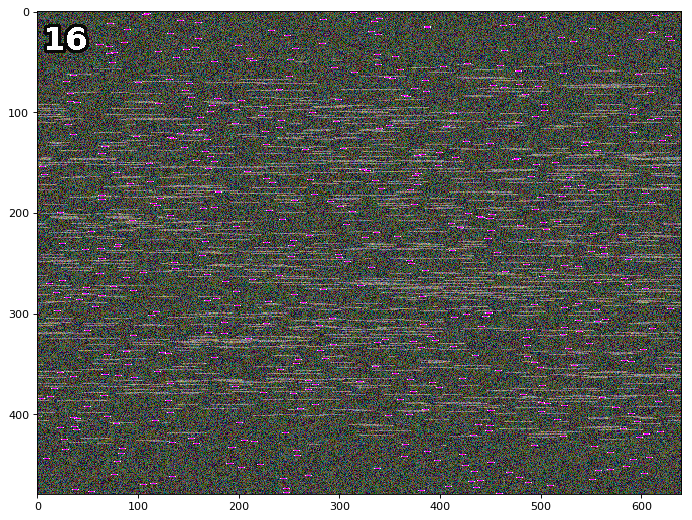

In [2]:
image = Image.open('data/mozart.gif')

plt.figure(figsize=(12, 8), dpi=80)
plt.imshow(image)

Transform into numpy array

In [3]:
image = np.array(image)
height, width = image.shape
print image.shape

(480, 640)


Find for the index of the little bar for each row, which gives the offset of the row. After some trial & error, I found that 195 is the right color/number.

In [4]:
indexes = []

for row_idx, row in enumerate(image):
    
    curr = row[0]
    count = 1
    idx = -1
    
    for curr_idx, el in enumerate(row[1:]):
        
        if el == curr:
            count += 1
            if count == 5 and el == 195:
                # print row_idx, el, curr_idx, count
                indexes.append(curr_idx)
                break
        else:
            count = 1
            curr = el
            idx = curr_idx

SOLUTION 1: Remove half width from each index, to make it some kind of offset from the center of the image. Then create an image that has double the width and paste each row taking into account its offset.

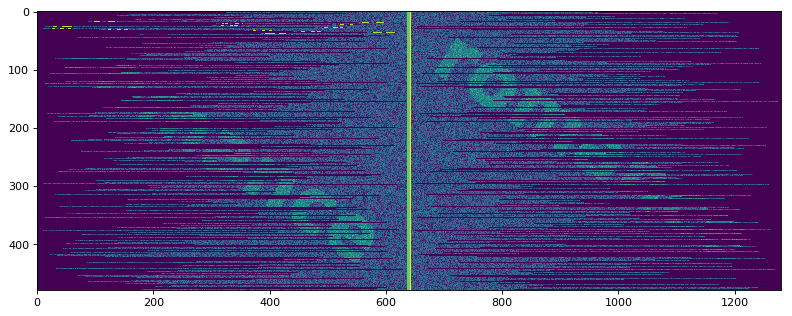

In [5]:
offsets = [idx - width / 2 for idx in indexes]

out_image = np.zeros(shape=(height, width * 2))

for row_idx, (row, offset) in enumerate(zip(image, offsets)):
    out_image[row_idx, width / 2 - offset : width / 2 - offset + width] = row
    
plt.figure(figsize=(12, 8), dpi=80)
plt.imshow(out_image)

SOLUTION 2: Probably they were asking for a single-width image and slice each row given the offset, but we can still read the solution :)

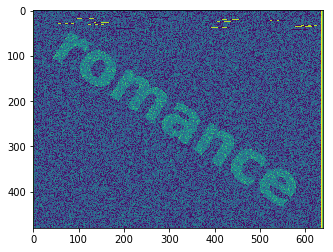

In [6]:
out_image = np.zeros(shape=(height, width))

for row_idx, (row, index) in enumerate(zip(image, indexes)):
    left_offset, right_offset = row[:index], row[index:]
    
    out_image[row_idx, :len(right_offset)] = right_offset
    out_image[row_idx, len(right_offset):] = left_offset
    
plt.imshow(out_image)

That's better :)